# Helicity as a discriminator in a search for charged Higgs bosons

The goal of this exercise is to use theoretical knowledge of helicity to help us in experimental analysis. 

Helsinki Institute of Physics is involved in a search for charged Higgs bosons in the CMS collaboration. If one adds a second scalar doublet to the standard model, we get in total five physical Higgs bosons. Three of them are neutral and two have an electrical charge. Models predicting these bosons are called *two-Higgs-doublet models* and they are the first step towards, for instance, supersymmetry and therefore an observation of a charged Higgs boson would be clear evidence of Beyond the Standard Model theories. 

We will use two simulated data sets in our analysis: 

- Charged Higgs boson signal sample
- W + jet background sample 

With these we will study the decay of charged Higgs bosons into a tau lepton and a tau neutrino.


When searching for new particles, we need to impose cuts on observable variables to increase the signal-to-background ratio. Imposing a cut means selecting collision events based on some criterion. By understanding the nature and the underlying physics of different processes, we can make selections on the phase space to target regions where we expect our process of interest to have a significant contribution. As a simple example, if we are interested in a process, which produces two leptons, then we can cut away all recorded collision events which didn't produce at least two leptons.

When imposing a cut, we typically cut away background events (i.e. collision events we are not interested in) but also some signal events (i.e. events of interest). We want to make sure that every cut takes only a small amount of signal events away, while reducing the number of background events significantly more. 

The helicity of tau leptons carries information about their origin, so it provides a useful handle for discrimination between the tau leptons originating from charged Higgs boson decays and those originating from a W decays. Therefore, we will use a variable called $R_{\tau}$ to discriminate between the signal and the background in this exercise.

With particle detectors, we record the flight paths of the charged particles produced in a collision event. These paths are typically called tracks, and they are measured using tracker subdetectors. "Leading track" refers to the track with the highest measured $p_T$.

Neutrinos are always left-handed in the Standard Model. Tau leptons produced in a charged Higgs boson decay are always right-handed, since a charged Higgs boson is a scalar particle. On the other hand (pun intended), when a vector boson W decays into a tau lepton, the tau lepton is forced to be left-handed, since the neutrino is left-handed. It turns out that this influences the kinematics of the tau lepton decay. Unlike electrons and muons, taus can decay into hadrons. Emission of the particle corresponding to the leading track is more likely to be towards the tau lepton's direction of movement for the right-handed tau. Therefore, in laboratory coordinates, the leading tracks originally caused by the decay of the charged Higgs boson have, on average, larger momentum than the ones caused by the decay of the W boson.

$R_{\tau}$ is defined as the leading track $p_T$ of a tau lepton divided by the $p_T$ of the tau lepton. In the data files, the momentum variables are called _LeadingTrackPt_ and _TauPt_. $R_{\tau}$ can be calculated by

$$
R_{\tau} = \frac{\text{LeadingTrackPt}}{\text{TauPt}}.
$$

## Part 1 - Calculate $R_{\tau}$

This week's task is to find an optimal value for a cut on $R_{\tau}$ that removes some of the background events without taking too much of the signal away. Use the Hplus1.csv and WJet1.csv data sets in this task.

We begin with reading the aforementioned files. Your first task after that is to calculate the $R_{\tau}$ values for both the Hplus and the WJet data sets. Then calculate the average value of $R_{\tau}$ for both.


In [1]:
import pandas as pd
import numpy as np

# Read the data sets
# Calculate the R_tau values and return the average of R_tau for both data sets.

Hplus = pd.read_csv('./Hplus1.csv')
R_H = Hplus['LeadingTrackPt']/Hplus['TauPt'] 
print(f'The average R_τ for the charge Higgs boson dataset is {round(R_H.mean(),4)}')

WJet = pd.read_csv('./WJet1.csv')
R_W = WJet['LeadingTrackPt']/WJet['TauPt'] 
print(f'The average R_τ for the W+ dataset is {round(R_W.mean(),4)}')


The average R_τ for the charge Higgs boson dataset is 0.6198
The average R_τ for the W+ dataset is 0.5871


## Part 2 - Plotting the data

It's always a good idea to plot the data to understand what is going on. Use the R_tau distributions you obtained in the previous part and plot both of the data sets in a histogram.


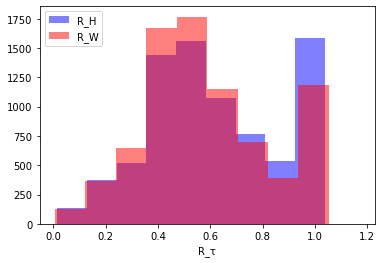

In [2]:
import matplotlib.pyplot as plt

# Plot the R_tau histograms for both data sets and compare them
plt.hist(R_H, alpha=0.5, label='R_H', color='blue')  
plt.hist(R_W, alpha=0.5, label='R_W', color='red')   
plt.xlabel('R_τ')
plt.legend();

## Part 3 - Finding the optimal cut

Finally, you should find the optimal $R_{\tau}$ cut that gives us the best purity.
The purity $P$ (or signal-to-background ratio) can be calculated by

$$
P = \frac{\text{(number of signal events after the cut)}}{\text{(number of background events after the cut)}}.
$$

Iterate over different $R_{\tau}$ cut values to find the optimal purity, i.e. the maximum purity value we can obtain. Always calculate the purity only for the events that have a higher $R_{\tau}$ value than the cut. In other words, the event selection is implemented by requiring $R_{\tau} > \mathrm{cut}_{R_{\tau}}$.

To find the optimal cut, try 1000 $\mathrm{cut}_{R_{\tau}}$ values evenly spaced between [0, 1]. If the cut value is over 1 there aren't enough collision events left for proper data analysis. Find the optimal cut value and print the purity obtained with it.


In [3]:
# Find the optimal R_tau cut


# The signal events are those of the charged Higgs and the background
# are those of the W+ 

# Function to calculate purity for a given cut
def calculate_purity(cut, R_tau_signal, R_tau_background):
    
    # Select events that pass the cut (R_tau > cut)
    signal_after_cut = R_tau_signal[R_tau_signal > cut]
    background_after_cut = R_tau_background[R_tau_background > cut]
    
    # If there are no background events after the cut, set purity to infinity (to avoid division by zero)
    if len(background_after_cut) == 0:
        return np.inf
    # Calculate purity
    purity = len(signal_after_cut) / len(background_after_cut)
    return purity

# Find the optimal cut value by calculating purity for each cut
optimal_purity = -np.inf
optimal_cut = None

# Range of cut values (1000 evenly spaced values between 0 and 1)
cut_values = np.linspace(0, 1, 1000)

for cut in cut_values:
    purity = calculate_purity(cut, R_H, R_W)
    if purity > optimal_purity:
        optimal_purity = purity
        optimal_cut = cut

print(f"Optimal Rτ cut value: {round(optimal_cut,6)}")
print(f"Maximum purity obtained: {round(optimal_purity,6)}")

Optimal Rτ cut value: 0.825826
Maximum purity obtained: 1.323662
